This code ingests:
    
- A directory containing images of embedding plots.

And outputs:

- A 3x3 grid with superimposed text of the embedding parameters.

In [2]:
from utils.imutil import *
from utils.mosaic import *
from utils.list_all_files import *
import numpy as np
import cv2

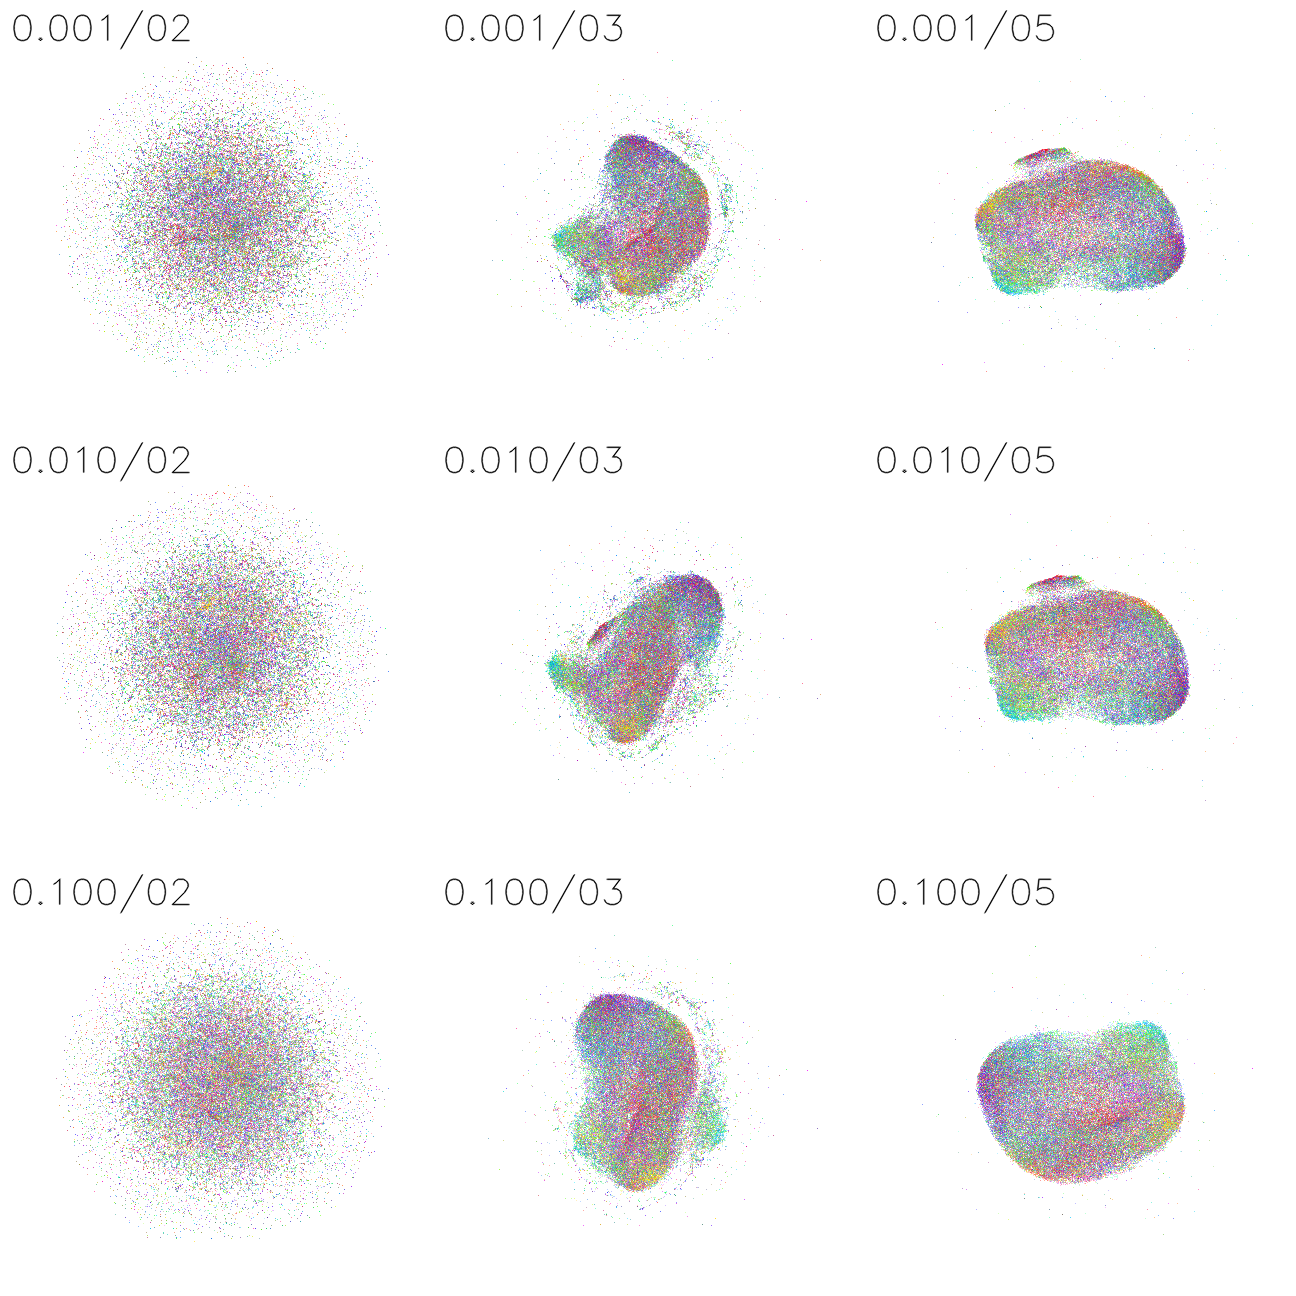

In [3]:
input_dir = '../data/embeddings/openface+microsoft'

font = cv2.FONT_HERSHEY_SIMPLEX
font_size = 1.2
font_color = (0, 0, 0)
font_weight = 0

filenames = list(list_all_files(input_dir, '.png'))
filenames.sort()
images = []
for fn in filenames:
    canvas = imread(fn)
    canvas = np.ascontiguousarray(canvas[:,:,:3])
    text = os.path.split(fn)[1]
    text = os.path.splitext(text)[0]
    text = text.replace('_', '/')
    cv2.putText(canvas, text, (10,40), font, font_size, font_color, font_weight, cv2.LINE_AA)
    images.append(canvas)
    
mosaic = make_mosaic(np.asarray(images))
imshow(mosaic)